# Word Embeddings

### Libraries

In [1]:
# import libraries

import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

### Datasets

In [2]:
# load review sentiment data

review_df = pd.read_csv('data/review_sentiment.csv')

review_df

,review_id,text,sentiment
0,LLzom-2TITa4gasV7_fCCA,Great experience purchasing a washer and dryer...,1
1,a5JHzBrWxRd_OmIvV7znDA,Went here based on the high ratings and raves ...,-1
2,X-o--dwf0HuFMittYi4wCA,"oh Millers, how i wanted to like you. You are...",-1
3,INGNbsyo-MouZZzcxnCSGQ,This place gets two stars from me only because...,-1
4,k7VatXVLism-cTDJE8TTUw,"This place was awesome. Clean, beautiful and t...",1
...,...,...,...
11681,IlU-MQzMKc7jAHWwK5VFGQ,"To be fair, I tried them in their first week. ...",0
11682,Qt3BsRvQuJccDQfFWM1XPw,Awful place. It's dirty. Had two birthday part...,-1
11683,3CQQ8Im_UX6QqDECuXYK8A,A truly vegetarian delight! I took a Jewish f...,1
11684,ery1nBM7zKweFLBe-bT5ag,I have a 2011 Toyota Sienna Limited. During th...,-1


### Preprocessing

In [3]:
# preprocess the reviews using gensim

corpus = []
for review in review_df['text']:
    corpus.append(simple_preprocess(review))

In [4]:
# see content of processed reviews

for review in corpus[:5]:
    print('-' * 50)
    print(review)

--------------------------------------------------
['great', 'experience', 'purchasing', 'washer', 'and', 'dryer', 'just', 'bought', 'new', 'home', 'and', 'needed', 'all', 'new', 'appliances', 'iam', 'so', 'glad', 'decided', 'to', 'go', 'even', 'though', 'the', 'reviews', 'were', 'not', 'great', 'which', 'don', 'understand', 'since', 'had', 'no', 'issues', 'whatsoever', 'there', 'was', 'an', 'excellent', 'selection', 'knowledgeable', 'salespeople', 'and', 'timely', 'delivery', 'the', 'level', 'of', 'service', 'we', 'received', 'was', 'beyond', 'expected', 'really', 'felt', 'like', 'they', 'were', 'working', 'hard', 'to', 'give', 'me', 'the', 'best', 'price', 'and', 'offered', 'many', 'options', 'to', 'stay', 'in', 'my', 'budget', 'they', 'even', 'took', 'the', 'time', 'to', 'check', 'if', 'there', 'were', 'any', 'additional', 'sales', 'prices', 'or', 'discounts', 'they', 'could', 'offer', 'me', 'was', 'given', 'honest', 'feedback', 'and', 'all', 'of', 'my', 'questions', 'were', 'answer

### Dense embeddings

In [5]:
# documents representing reviews

documents = corpus

len(documents)

11686

In [6]:
# see contents of documents

print(documents[0])

['great', 'experience', 'purchasing', 'washer', 'and', 'dryer', 'just', 'bought', 'new', 'home', 'and', 'needed', 'all', 'new', 'appliances', 'iam', 'so', 'glad', 'decided', 'to', 'go', 'even', 'though', 'the', 'reviews', 'were', 'not', 'great', 'which', 'don', 'understand', 'since', 'had', 'no', 'issues', 'whatsoever', 'there', 'was', 'an', 'excellent', 'selection', 'knowledgeable', 'salespeople', 'and', 'timely', 'delivery', 'the', 'level', 'of', 'service', 'we', 'received', 'was', 'beyond', 'expected', 'really', 'felt', 'like', 'they', 'were', 'working', 'hard', 'to', 'give', 'me', 'the', 'best', 'price', 'and', 'offered', 'many', 'options', 'to', 'stay', 'in', 'my', 'budget', 'they', 'even', 'took', 'the', 'time', 'to', 'check', 'if', 'there', 'were', 'any', 'additional', 'sales', 'prices', 'or', 'discounts', 'they', 'could', 'offer', 'me', 'was', 'given', 'honest', 'feedback', 'and', 'all', 'of', 'my', 'questions', 'were', 'answered', 'am', 'very', 'happy', 'with', 'sears', 'and',

In [7]:
# model training

model = Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)

In [8]:
# embeddings

model.wv.get_vector("good")

array([ 1.83445200e-01, -1.19781248e-01, -2.32567638e-02,  4.32053268e-01,
        3.53476286e-01, -1.08121410e-01,  1.19024545e-01,  3.24915685e-02,
       -5.92375472e-02, -2.27833763e-02, -9.30590630e-02, -5.28617315e-02,
       -2.19531223e-01,  1.04363829e-01, -4.41497266e-02,  4.48162518e-02,
        9.83486995e-02,  2.97650158e-01, -1.02611654e-01, -8.62826258e-02,
       -5.44348247e-02, -3.46186906e-01, -6.21112324e-02,  1.50979862e-01,
        2.47010246e-01, -2.63598770e-01, -1.60323307e-02,  2.16465786e-01,
       -2.40544751e-01, -2.29085431e-01, -1.64325580e-01, -1.87469751e-01,
       -8.61612409e-02, -1.25661073e-02, -1.45920575e-01,  5.90438838e-04,
        3.25940363e-02, -8.52670968e-02,  2.75339276e-01, -3.86965200e-02,
       -1.05531484e-01,  2.21921444e-01, -9.18180496e-02, -3.87208983e-02,
        3.04440916e-01,  2.83160340e-02, -1.88451931e-02, -1.18018650e-02,
        1.11162074e-01,  3.35188985e-01, -3.37331176e-01,  3.79422575e-01,
        2.79081285e-01,  

In [9]:
# similarity

model.wv.most_similar(positive="good")

[('underwhelming', 0.7438048720359802),
 ('outrageously', 0.7228362560272217),
 ('great', 0.7165464758872986),
 ('decent', 0.7155913710594177),
 ('skimped', 0.7152799367904663),
 ('potstickers', 0.7129173874855042),
 ('paninis', 0.7065517902374268),
 ('decently', 0.7056686878204346),
 ('solid', 0.7052648663520813),
 ('satisfying', 0.7048661708831787)]

In [10]:
# similarity

model.wv.most_similar(positive="bad")

[('horrible', 0.6435999274253845),
 ('wowed', 0.636924147605896),
 ('compelled', 0.6359608173370361),
 ('lousy', 0.6289284229278564),
 ('terribly', 0.6281933784484863),
 ('deducted', 0.625701367855072),
 ('bizarre', 0.6233023405075073),
 ('shitty', 0.6171818375587463),
 ('ruined', 0.6161934733390808),
 ('redeeming', 0.6161266565322876)]

In [11]:
# save full model (including trainable vectors to resume training)

model.save("embeddings/reviews_model")

In [12]:
# save model word vectors

model.wv.save("embeddings/reviews_wv")

### Vector visualization

In [13]:
def reduce_dimensions(model, num_dimensions=2, words=[]):
    '''
    Reduce the dimensions of the word vectors using t-SNE for plotting
    '''
    vectors = []
    labels = []
    if (words == []):
        words = model.wv.index_to_key
    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=4.0)
    vectors = tsne.fit_transform(vectors)
    return vectors, labels

In [14]:
def plot_word_vectors(x_vals, y_vals, labels, words=[]):
    '''
    Plot the reduced dimensions of the word vectors using matplotlib
    '''
    random.seed(0)
    x_vals_new = np.array([])
    y_vals_new = np.array([])
    labels_new = np.array([])
    if(words == []):
        x_vals_new = x_vals
        y_vals_new = y_vals
        labels_new = labels
    else:
        for i in range(len(labels)):
            if(labels[i] in words):
                x_vals_new = np.append(x_vals_new,x_vals[i])
                y_vals_new = np.append(y_vals_new,y_vals[i])
                labels_new = np.append(labels_new,labels[i])
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals_new, y_vals_new)
    for i in range(len(labels_new)):
        plt.annotate(labels_new[i], (x_vals_new[i], y_vals_new[i]))
    plt.show()

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


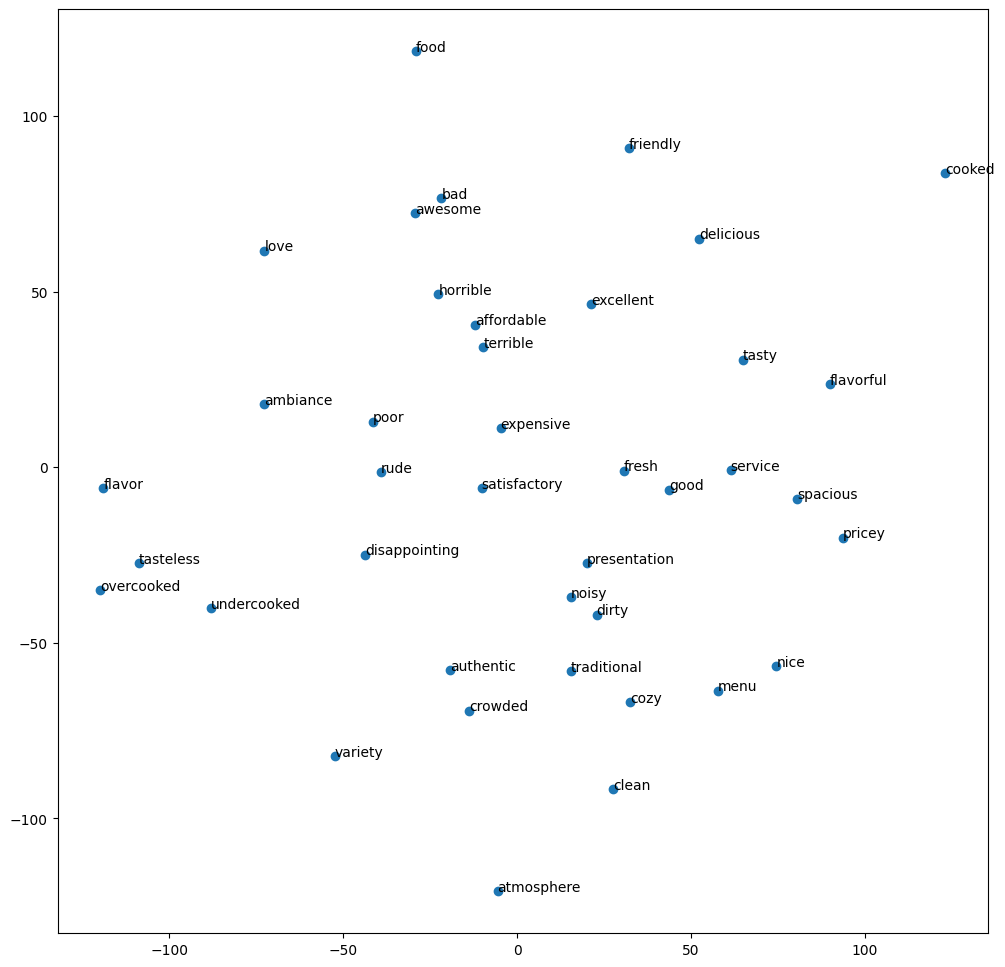

In [15]:
# visualize word vectors

all_words = [word for doc in documents for word in doc]
words = random.sample(all_words, 50)
interesting_words = ['good', 'bad', 'excellent', 'poor', 'awesome', 'terrible', 'nice', 'horrible', 'satisfactory', 'food', 'delicious', 'tasty', 'disappointing', 'service', 'ambiance', 'atmosphere', 'pricey', 'presentation', 'menu', 'variety', 'fresh', 'cooked', 'flavorful', 'tasteless', 'overcooked', 'undercooked', 'friendly', 'rude', 'clean', 'dirty', 'crowded', 'spacious', 'cozy', 'noisy', 'expensive', 'affordable', 'authentic', 'traditional', 'flavor', 'love']

vectors, labels = reduce_dimensions(model, 3, interesting_words)
x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

plot_word_vectors(x_vals, y_vals, labels, interesting_words)
